# Multiple Linear Regression

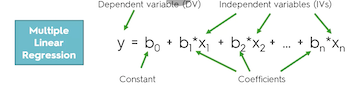

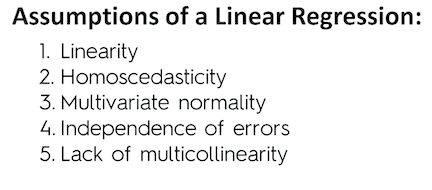

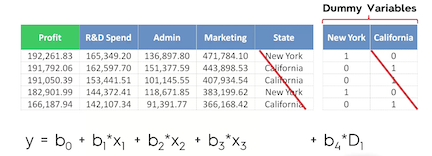

# Dummy variable in model = Dn-1 (always omit one dummy variable for each set)
Always exclude one dummy variable in your model dummy variable sets. You can not use all of them because it will cause multicollinearity issues. For instance, in this case you cannot have both dummy variables because D2=1-D1. They variables are collinear in this regard. If you had another column of industry with 2 industries, you would end up with only 2 dummy variables. 2-1 for each set.



# Statistical Significance

At 95% Confidence interval we would reject the null hypothesis in the case of landing on tails this many times with a coin.

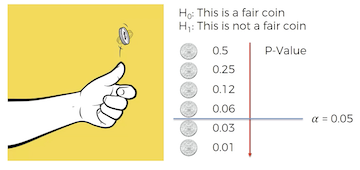

# Building a Model
5 methods of building models:

1. All-in
*   Prior knowledge; or
*   You have to; or
*   Prepararing for Backward elimination

2. Backward Elimination
*   Step 1: Select significance level i.e. SL=.05 @ 95 % confidence
*   Step 2: Fit the full model with all possible predictors
*   Step 3: Consider the predictor with the HIGHEST P-value. If P-value > SL, go to step 4, otherwise go to FINISH (model is ready)
*   Step 4: Remove the predictor
*   Step 5: Re-Fit the model without this variable*

3. Forward Selection
*   Step 1: Select signifcance level i.e SL=.05
*   Step 2: Fit all simple regression models, y ~ Xn, Select one with LOWEST P-value
*   Step 3: Keep this variable and fit all possible models with one extra predictor added to the one(s) you already have (bascially add on other variables one by one to build models with the variable we chose in step 2
*   Step 4: Consider the predictor with the LOWEST P-value. If P< SL, go to step 3 and repeat over and over until you grow the model with all possibe combos one variable at a time, otherwise you are finished

4. Bidirectional Selection
*   Step 1: Select a SL to enter and to stay in the model; SL Enter = .05, SL Stay = .05 
*   Step 2: Perform the next step of the forward selection (new variables must have a P < SL Enter to enter)
*   Step 3: Perform all the steps of the Backward Elmination (old variables must have P < SL Stay to stay), go back to step 2 and repeat until your done
*   Step 4: No new variables can enter and no old variables can exit

5. All possible models/Score comparison (tasking and not the best method; better to select what is considered relavant first)
*   Step 1: Select a criterion of goodness of fit (e.g. akaike criterion)
*   Step 2: Construct all possible models: 2^n-1 total combos (i.e. 10 columns yields 1023 models)
*   Step 3: Select the one with the best criterion, then finished

2-4: sometimes called stepwise regression


## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv("50_Startups.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [4]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


## Encoding categorical data

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

# If you want to preserve column order for the dummy variables look at using get_dummies from pandas

In [6]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [7]:
# I want to save the sequence of features to remeber them after encoding
#  CA, FL, NY, R&D Spendm Admin Spend, Marketing Spend
# And Drop CA from the dummy variables to avoid multicollinearity
X = np.delete(X, 0, axis=1)
# could also be done with X=X[:,1:]
print(X)

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 134615.46 147198.87 127716.82]
 [1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 120542.52 148718.95 311613.29]
 [0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 101913.08 110594.11 229160.95]
 [0.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 93863.75 127320.38 249839.44]
 [0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 86419.7 153514.11 0.0]
 [0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 73994.56 122782.75 303319.26]
 [1.0 0.0 67532.53 105751.03 304768.73]
 [0.0 1.0 77044.01 99281.34 140574.81]
 [0

## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


## Training the Multiple Linear Regression model on the Training set

In [9]:
# The class we use for multiple linear regression automatically takes care of the dummy variable trap and gets rid on one
# It also automatically eliminates the features that are not significant (it does backwards elimination for us)
### I got rid of the dummy variable above on my own because I was not able to verify the first comment based on the ML A-Z udemy class

from sklearn.linear_model import LinearRegression
# Build the model
regressor = LinearRegression()
# usually for linear regression we just keep the class parameters the default as they rarely need to be changed

# Train the model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# See what coefficients were chosen by the model
coeff_df = pd.DataFrame(regressor.coef_)
coeff_df

,0
0,-959.284160
1,699.369053
2,0.773467
3,0.032885
4,0.036610


In [11]:
# See the intercept
regressor.intercept_

42554.167617767

## Predicting the Test set results

In [12]:
y_pred = regressor.predict(X_test)

# will display the array with only 2 decimals for results
np.set_printoptions(precision=2)

# Use the concatenate function to join the y_pred and y_test results and reshape them to display them vertically
# The reshape method changes the shape of the vector, but you must tell it how many columns are in the data (i.e the length of the list)
# And then the number of columns you want it to be (i.e the 1 after y_pred); do the same for y_test
# Finally, the last 1 is for the axis type, a 0 means you want a vertical concatenation, 1 means you want horizontal concatenation
# Concatenating two veritical vectors together is a horizonatel concat, so axis=1
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [13]:
# Looking at how well the model predicts the test data
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9347068473282987

In [14]:
# Another method to use for R^2
# Compares the X_test predictions to the y_test actual using the model
regressor.score(X_test, y_test)

0.9347068473282986

In [15]:
# Looking to see how well the model predicts the training data
r2_score(y_train, regressor.predict(X_train))

0.9501847627493607

In [16]:
# Another method to use for R^2
# Compares the X_train predictions to the y_train actual using the model
regressor.score(X_train, y_train)

0.9501847627493607

# Use the model to make a prediction and remember the order of coeff


In [17]:
#  FL, NY, R&D Spendm Admin Spend, Marketing Spend
new_x = [[1.0, 0.0, 76253.86, 96189.63, 28334.72]]
pred_1 = regressor.predict(new_x)
print('Predicted Price= ',pred_1)

Predicted Price=  [104775.23]


# It looks like based on the original linear regression model without the dropped dummy variable that the results are the same as when I dropped the dummy variable. However, I will drop dummy variables anyways to avoid the multicollinearity trap.